In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skimage
from matplotlib.patches import ConnectionPatch
import scipy

In [ ]:
pwd

'/content'

In [ ]:
cd gdrive/

/content/gdrive


In [ ]:
cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
cd randomFolder/

/content/gdrive/MyDrive/randomFolder


In [ ]:
ls

1viewfigs-keble.000_interp.png  justJPG/
1viewfigs-keble.000.png         lorenIpsum.jpg.txt
1viewfigs-keble.003.png         projgeomfigs-floor.fronto.png
1viewfigs-keble.006.png         projgeomfigs-floor.persp.png


**DISPLAYING 4 CORRESPONDING POINTS IN TWO IMAGES**

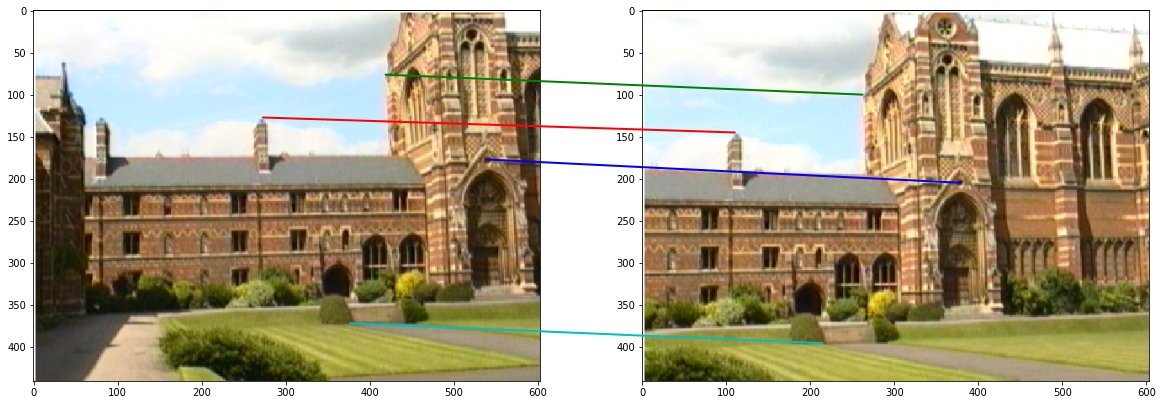

In [ ]:
img_1 = Image.open('1viewfigs-keble.000.png')
img_2 = Image.open('1viewfigs-keble.003.png')

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_1)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_2)


# Draw an arrow between the same point in data coordinates,
# but in different axes.

#Line1
xy = (273,127)
x2y2 = (116,145)
con1 = ConnectionPatch(xyA=xy, coordsA=ax1.transData,xyB=x2y2, coordsB=ax2.transData,arrowstyle="-", shrinkB=5)
con1.set_color('r')
con1.set_linewidth(2)

#Line2
xy = (540,177)
x2y2 = (385,205)
con2 = ConnectionPatch(xyA=xy, coordsA=ax1.transData, xyB=x2y2, coordsB=ax2.transData, arrowstyle="-", shrinkB=5)
con2.set_color('b')
con2.set_linewidth(2)

#Line3
xy = (419,76)
x2y2 = (268,100)
con3 = ConnectionPatch(xyA=xy, coordsA=ax1.transData, xyB=x2y2, coordsB=ax2.transData, arrowstyle="-", shrinkB=5)
con3.set_color('g')
con3.set_linewidth(2)

#Line4
xy = (377,372)
x2y2 = (220,396)
con4 = ConnectionPatch(xyA=xy, coordsA=ax1.transData, xyB=x2y2, coordsB=ax2.transData, arrowstyle="-", shrinkB=5)
con4.set_color('c')
con4.set_linewidth(2)

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(con3)
fig.add_artist(con4)

pass

In [ ]:
x = {'p0':(273,127),'p1':(540,177),'p2':(419,76),'p3':(377,372)}
x_t = {'p0':(116,145),'p1':(385,205),'p2':(268,100),'p3':(220,396)}

**COMPUTING THE 8X9 MATRIX A**

In [ ]:
A = np.array([])
for i in range(4):
  k = str(i)
  x0,y0 = x['p'+k]
  x_t0,y_t0 = x_t['p'+k]
  p = np.array([[-x0, -y0, -1, 0, 0, 0, x0*x_t0, y0*x_t0, x_t0],
               [0, 0, 0, -x0, -y0, -1, x0*y_t0, y0*y_t0, y_t0]])
  if i == 0:
    A = p
  else:
    A = np.concatenate((A,p),axis=0)

print(A)

[[  -273   -127     -1      0      0      0  31668  14732    116]
 [     0      0      0   -273   -127     -1  39585  18415    145]
 [  -540   -177     -1      0      0      0 207900  68145    385]
 [     0      0      0   -540   -177     -1 110700  36285    205]
 [  -419    -76     -1      0      0      0 112292  20368    268]
 [     0      0      0   -419    -76     -1  41900   7600    100]
 [  -377   -372     -1      0      0      0  82940  81840    220]
 [     0      0      0   -377   -372     -1 149292 147312    396]]


**DECOMPOSING A USING SVD**

In [ ]:
U,S,Vt = np.linalg.svd(A)
print('Size of A matrix: ',A.shape)
print('Size of U matrix: ',U.shape)
print('Size of S matrix: ',S.shape)
print('Size of Vt matrix: ',Vt.shape)

Size of A matrix:  (8, 9)
Size of U matrix:  (8, 8)
Size of S matrix:  (8,)
Size of Vt matrix:  (9, 9)


**COMPUTING THE 3X3 MATRIX H**

In [ ]:
V = Vt.T
H = V[:,-1].reshape(3,3)
print('Size of H matrix: ',H.shape)

Size of H matrix:  (3, 3)


**CHECK H MATRIX BY APPLYING ON ANY OF THE POINTS**

In [ ]:
x = np.array([273,127,1]).reshape(3,1)
print(x)

[[273]
 [127]
 [  1]]


In [ ]:
print(H)

[[-6.07435722e-03  8.19880719e-05  9.99409342e-01]
 [-4.01272861e-04 -5.77915627e-03  3.29032203e-02]
 [-1.09013196e-06 -9.85168831e-08 -5.28020727e-03]]


**WE GET THE SCALED VERSION OF TRANSFORMED POINT**

In [ ]:
x_t = np.dot(H,x)
print(x_t)

[[-0.64847769]
 [-0.81059712]
 [-0.00559032]]


**WE GET THE SAME POINT**

In [ ]:
x_t = x_t / x_t[2]
print(x_t.astype('uint8'))

[[115]
 [145]
 [  1]]


**FINDING THE CORNERS OF STITCHED IMAGE BY APPLYING INVERSE HOMOGRAPHY TO CORNERS OF IMAGE 2**

In [ ]:
H_inv = np.linalg.inv(H)
x = np.dot(H_inv,x_t)
x = x/x[2]
print(x)

[[273.]
 [127.]
 [  1.]]


In [ ]:
img_2.size

(604, 441)

**MAPPING IMAGE 2 CORNERS**

In [ ]:
ltc = np.array([0,0,1]).reshape(3,1)
lbc = np.array([0,441,1]).reshape(3,1)
rtc = np.array([604,0,1]).reshape(3,1)
rbc = np.array([604,441,1]).reshape(3,1)

ltc_new = np.dot(H_inv,ltc) / np.dot(H_inv,ltc)[2]
lbc_new = np.dot(H_inv,lbc) / np.dot(H_inv,lbc)[2]
rbc_new = np.dot(H_inv,rbc) / np.dot(H_inv,rbc)[2]
rtc_new = np.dot(H_inv,rtc) / np.dot(H_inv,rtc)[2]

print('INVERSE MAPPING CORNERS OF IMAGE 2 \n')

print('TOP LEFT          [0,0] : ',ltc_new[0:2].astype('int').flatten())
print('BOTTOM LEFT     [0,441] : ',lbc_new[0:2].astype('int').flatten())
print('TOP RIGHT       [604,0] : ',rtc_new[0:2].astype('int').flatten())
print('BOTTOM RIGHT  [604,441] : ',rbc_new[0:2].astype('int').flatten())

print('\n')
max_x = int(max(lbc_new[0],ltc_new[0],rtc_new[0],rbc_new[0]))
max_y = int(max(lbc_new[1],ltc_new[1],rtc_new[1],rbc_new[1]))
min_x = int(min(lbc_new[0],ltc_new[0],rtc_new[0],rbc_new[0]))
min_y = int(min(lbc_new[1],ltc_new[1],rtc_new[1],rbc_new[1]))

print('NEW IMAGE X RANGE: ',[min_x,max_x])
print('NEW IMAGE Y RANGE: ',[min_y,max_y])

print('\n')
print('STITCHED IMAGE DIMENSIONS: ',[784,488])

INVERSE MAPPING CORNERS OF IMAGE 2 

TOP LEFT          [0,0] :  [164  -5]
BOTTOM LEFT     [0,441] :  [170 414]
TOP RIGHT       [604,0] :  [772 -47]
BOTTOM RIGHT  [604,441] :  [784 422]


NEW IMAGE X RANGE:  [164, 784]
NEW IMAGE Y RANGE:  [-47, 422]


STITCHED IMAGE DIMENSIONS:  [784, 488]


**MERGING THE TWO IMAGES**

In [ ]:
img1 = np.asarray(img_1)
img2 = np.asarray(img_2)

In [ ]:
def homography(H,p):
    return np.dot(H,p) / np.dot(H,p)[2]

def inv_homography(H_inv,p):
    return np.dot(H_inv,p) / np.dot(H_inv,p)[2]

In [ ]:
inv_homography(H_inv,np.array([600,400,1]).reshape(3,1))

array([[778.72922664],
       [378.42596895],
       [  1.        ]])

In [ ]:
img1 = np.transpose(img1,(1,0,2))
img2 = np.transpose(img2,(1,0,2))
img1.shape

(604, 441, 3)

In [ ]:
#initialize an empty array
arr = np.zeros((784,488,3)).astype('uint8')

for i in range(604):
  for j in range(441):
    x,y,w = inv_homography(H_inv, np.array([i,j,1]).reshape(3,1))
    x = int(x)
    y = int(y) + 47 
    if x < 604 and y > 47 and y < 441:
      arr[x,y] = img1[x,y-47]
    else:
      arr[x,y] = img2[i,j]

arr[3:167,47:488] = img1[0:164,0:441]

In [ ]:
arr = np.transpose(arr,(1,0,2))
arr.shape

(488, 784, 3)

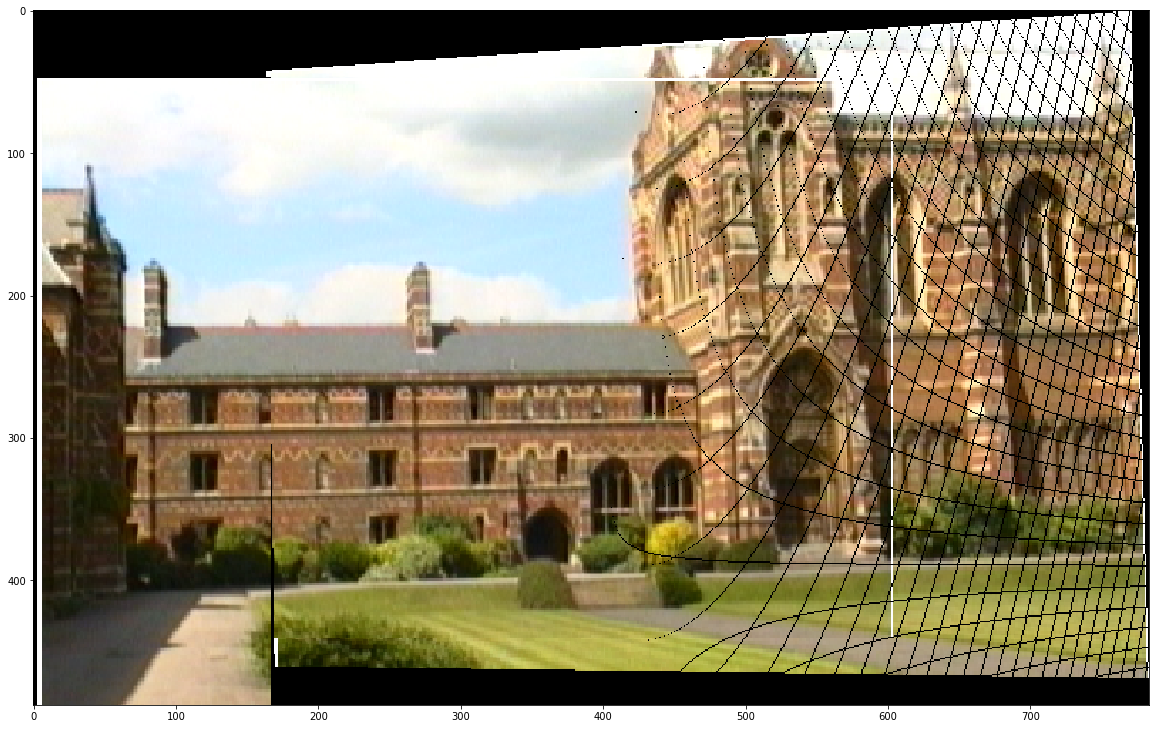

In [ ]:
plt.figure(figsize=(20,20))
stitched_img = Image.fromarray(arr)
plt.imshow(stitched_img, interpolation='nearest')
pass

**INTERPOLATING THE MISSING PIXELS**

In [220]:
arr2 = arr.copy()
arr2.shape

(488, 784, 3)

In [221]:
for i in range(arr2.shape[0]):
  for j in range(arr2.shape[1]):
    if sum(arr2[i,j]) == 0:
        mi_x = max(i-10,0)
        ma_x = min(i+11,arr2.shape[0])
        mi_y = max(j-10,0)
        ma_y = min(j+11,arr2.shape[1])
        arr2[i,j] = np.mean(arr2[mi_x:ma_x,mi_y:ma_y],axis=(0,1))

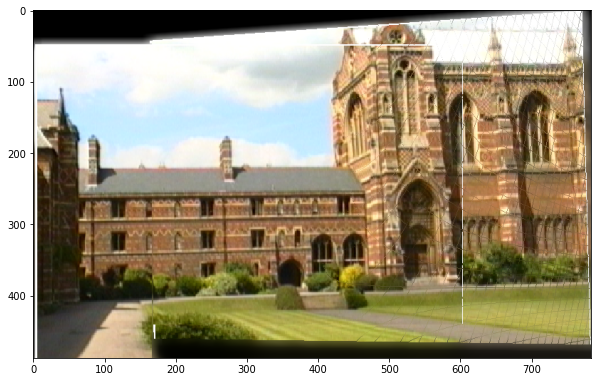

In [224]:
plt.figure(figsize=(10,10))
plt.imshow(arr2)
plt.show()

**DISPLAY CROPPED FINAL IMAGE**

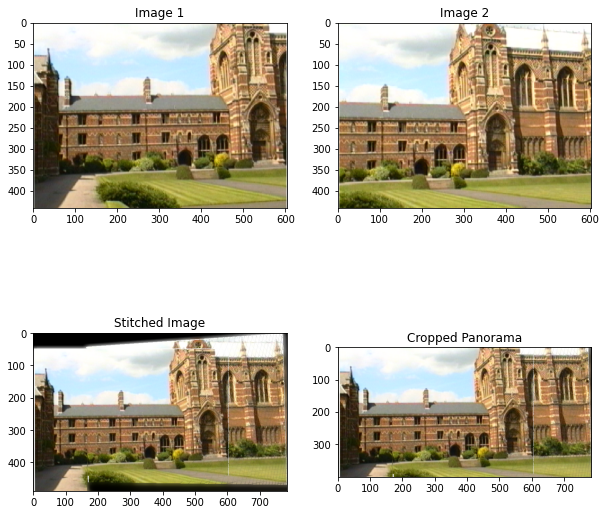

In [238]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img_1)
plt.title('Image 1')
plt.subplot(2,2,2)
plt.imshow(img_2)
plt.title('Image 2')
plt.subplot(2,2,3)
plt.imshow(arr2)
plt.title('Stitched Image')
plt.subplot(2,2,4)
plt.imshow(arr2[50:450,:])
plt.title('Cropped Panorama')
plt.show()